## Retrieving dataset from an S3 Bucket

In [3]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np


## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)


## define csv file to read in the bucket
file_key= 'Real_Estate.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Dropping the 'No' and 'transaction_date' column

In [4]:
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis =1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## Splitting data into 80% training and 20% testing

In [5]:
## so that we can test/evaluate our model
from sklearn.model_selection import train_test_split

## defining input and target variables
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
## ^^ taking everything but house price of unit area

Y = house_price['house_price_of_unit_area']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

## Building Simple Linear Regression Model

In [6]:
## only building the model to test on training dataset

from sklearn.linear_model import LinearRegression
lm_md = LinearRegression().fit(X_train, Y_train)

## Predicting on Test Dataset

In [7]:
lm_preds = lm_md.predict(X_test)
lm_preds

array([40.72815855, 40.48366819, 40.30589249,  8.91467877, 42.62573359,
       47.44825994, 45.9078883 , 43.84331367, 46.61179951, 46.67147458,
       32.40988373, 37.75460279, 45.1932595 , 12.85709889, 43.04405616,
       14.06766969, 41.59437719, 48.39918757, 48.76135204, 36.03709411,
       42.1373986 , 44.01048902, 50.09748854, 11.13864146, 14.07227101,
       35.13605219, 47.93542169, 41.64768111, 47.42044084, 12.98987542,
       38.08283129, 31.41544431, 50.32640951, 48.96463434, 53.01287175,
       33.24441681, 43.36222385, 37.41596488, 40.57105686, 45.9078883 ,
       29.44065753, 44.79697542, 32.08498645, 39.14576912, 31.89636796,
       45.99764453, 38.09877387, 22.1370193 , 32.63864835, 14.22520093,
       28.47522243, 24.34156936, 14.45923926, 43.84331367, 38.70629844,
       43.27545898, 45.93569943, 45.1168939 , 40.46240075, 33.54316602,
       45.39899123, 35.00235127, 46.81523924, 32.50821573, 43.61787982,
       14.2713113 , 29.34409562, 30.05158236, 30.6127454 , 31.99

## comparing model values vs. actual values

<function matplotlib.pyplot.show(close=None, block=None)>

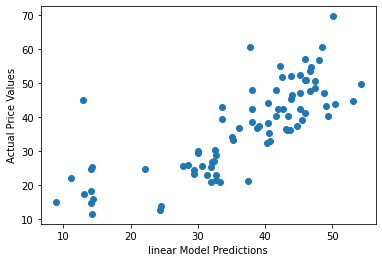

In [8]:
import matplotlib.pyplot as plt
plt.scatter(lm_preds, Y_test)
plt.xlabel('linear Model Predictions')
plt.ylabel('Actual Price Values')
plt.show

## Calculating MSE

In [23]:
## average of squared differences AVG((Actual - predictions)^2)
np.mean((Y_test -lm_preds)**2)

## compare this MSE to another model's MSE (you prefer a model with a lower MSE)
## Mean-Square Error

75.03785266338949